<a href="https://colab.research.google.com/github/urnotirisfeng/Visualisation-de-donn-es/blob/main/Visualisation2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Apprentissage Supervisé

行文思路 ：

监督学习（Apprentissage Supervisé）行文思路总结
🟢 1. 问题定义（Problématique）
明确预测目标：分类问题（例如是否批准贷款）或回归问题（例如预测保险费用）。

指出监督学习的核心：使用带有标签（目标值）历史数据，训练模型来对未来数据进行预测。



2. 数据理解与预处理（Compréhension et Préparation des Données）
数据加载：说明数据源及基本结构（特征 + 标签）。

缺失值处理：如何填补（中位数/众数/均值等）。

特征工程：

数值特征标准化（StandardScaler）

类别特征编码（LabelEncoder / OneHotEncoder）

数据划分：将数据分为训练集和测试集（train_test_split）。

3. 模型选择与训练（Choix et Entraînement du Modèle）
选择适合的监督学习模型：

分类问题：Logistic Regression, Random Forest, XGBoost, MLPClassifier 等。

回归问题：Linear Regression, Random Forest Regressor, XGBRegressor, MLPRegressor 等。

使用管道（Pipeline）将预处理和模型整合，保持训练一致性。

训练模型（fit() 方法）。

4. 模型评估（Évaluation du Modèle）
分类任务指标：

准确率（accuracy）

精确率、召回率、F1 分数（classification_report）

混淆矩阵（confusion_matrix）

回归任务指标：

均方根误差 RMSE

决定系数 R²（r2_score）

5. 超参数优化（Optimisation des Hyperparamètres）
使用 GridSearchCV 或 RandomizedSearchCV 进行交叉验证与参数调优。

明确调优参数和选择的评分标准（如 accuracy、neg_mean_squared_error 等）。

6. 特征选择（Sélection de Variables）
使用 BorutaPy、SelectKBest、模型内嵌重要性（feature_importances_）等方式筛选特征。

对比筛选前后的模型性能。

7. 模型对比与总结（Comparaison & Synthèse）
将多个模型的评估结果（准确率、RMSE、R² 等）并列展示。

可以可视化对比（柱状图 / 表格）。

总结哪个模型表现最佳，并说明适用场景。

8. 展望与改进（Ouvertures / Limites）
模型局限性（如过拟合、数据偏差、可解释性差等）。

可拓展方向：更多数据、更复杂模型（如深度学习）、特征工程优化等

# **EX1 Feature selection**

## **EX 1-1**

In [8]:
import pandas as pd
import numpy as np

file_path = "/content/credit.csv"
data = pd.read_csv(file_path)

print("Info：")
print(data.info())

# 查看前几行数据
print("\n5lines：")
print(data.head(5))

Info：
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB
None

5lines：
    Loan_ID Gender Married Dependents     Education Self_Employed  \
0  LP001002   Male     

In [9]:
print ("Lost valeur :")
print (data.isnull().sum())

Lost valeur :
Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64


In [10]:
print("List name：")
print(data.columns)

List name：
Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')


In [25]:
from sklearn.preprocessing import LabelEncoder  # 导入标签编码器（用于分类变量编码）

# 删除无用的 ID 列（如果存在 'Loan_ID' 字段）
if 'Loan_ID' in data.columns:
    data = data.drop(['Loan_ID'], axis=1)  # axis=1 表示按列删除


# 选出数值型特征列（float 和 int 类型）
numeric_cols = data.select_dtypes(include=[float, int]).columns

# 遍历每个数值列，使用该列的中位数填补缺失值
for col in numeric_cols:
    data[col].fillna(data[col].median(), inplace=True)


# 选出分类（字符串）特征列（例如 'Gender', 'Education' 等）
categorical_cols = data.select_dtypes(include=['object']).columns

# 遍历每个分类列，使用该列的众数（mode）填补缺失值
for col in categorical_cols:
    data[col].fillna(data[col].mode()[0], inplace=True)


# 初始化标签编码器（将分类字符串转换为整数编码）
label_encoder = LabelEncoder()

# 对每个分类列进行编码，并保留原列名
for col in categorical_cols:
    data[col] = label_encoder.fit_transform(data[col])

# 打印 DataFrame 的列名，验证原始列名是否保留
print("\n表头名称（保留原格式）：")
print(data.columns)


表头名称（保留原格式）：
Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')


<ipython-input-25-74aa566b0694>:13: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[col].fillna(data[col].median(), inplace=True)
<ipython-input-25-74aa566b0694>:21: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try 

In [26]:
from sklearn.model_selection import train_test_split  # 导入数据集划分函数
# 分离特征（X）和目标变量（y）
# 从原始数据中删除 'Loan_Status' 列作为特征集合
X = data.drop(columns=['Loan_Status'])

# 目标变量为 'Loan_Status'（是否批准贷款）
y = data['Loan_Status']

# 将数据集划分为训练集和测试集
# test_size=0.2 表示 20% 的数据作为测试集，其余作为训练集
# random_state=42 保证划分的可重复性
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.2, random_state=42)

# 打印训练集和测试集的样本大小
print("\nTrain size:", train_X.shape, "Test size:", test_X.shape)


Train size: (491, 11) Test size: (123, 11)


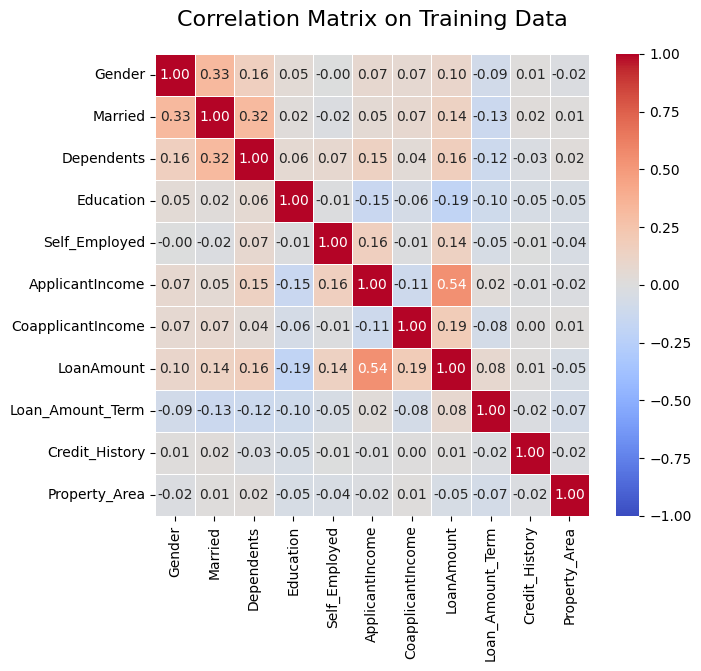

In [28]:
# 导入可视化相关库
import matplotlib.pyplot as plt             # 用于基本图形绘制
import seaborn as sns                      # 基于 matplotlib 的高级绘图库
import numpy as np                         # 用于数值计算，如生成掩码矩阵

# 定义绘制相关性热力图的函数
def plot_correlation_matrix(data, title="Correlation Matrix"):
    plt.figure(figsize=(7, 6))  # 创建图形窗口，设置尺寸为 7x6 英寸

    # 计算特征之间的皮尔逊相关系数矩阵（数值越接近 ±1 表示越强相关）
    corr_matrix = train_X.corr()


    # 创建上三角掩膜（只显示矩阵下三角，避免重复显示）
    mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
    # 绘制热力图（带掩膜、颜色映射、注释等）
    sns.heatmap(
        corr_matrix,
        annot=True,               # 在每个格子内显示相关系数数值
        fmt=".2f",                # 保留两位小数
        cmap='coolwarm',          # 使用红-蓝色调颜色映射（负相关为蓝，正相关为红）
        vmin=-1, vmax=1,          # 设置颜色条数值范围 [-1, 1]
        linewidths=0.5,           # 单元格之间的线宽
        annot_kws={"size": 10},   # 注释字体大小

    )

    # 设置图表标题
    plt.title(title, fontsize=16, pad=20)

    # 显示图像
    plt.show()
# 调用函数：绘制训练集特征之间的相关性热力图
plot_correlation_matrix(train_X, title="Correlation Matrix on Training Data")

## **EX1.2 - Boruta算法和随机森林**
Boruta 是一种基于随机森林的特征选择算法。

目的： 自动选择对目标变量（标签）具有显著影响的特征。

特点：

不依赖特征缩放。

能够发现非线性和交互作用特征。

比传统的特征重要性方法（如feature_importances_）更稳健。



***特征选择***

In [35]:
!pip install boruta

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.9/57.9 kB 2.2 MB/s eta 0:00:00


In [36]:
from sklearn.ensemble import RandomForestClassifier
from boruta import BorutaPy

In [37]:
from sklearn.ensemble import RandomForestClassifier  # 导入随机森林分类器

# 初始化一个随机森林分类器对象
rf = RandomForestClassifier(
    n_jobs=-1,           # 使用所有可用 CPU 核心并行训练，提高训练速度
    max_depth=5,         # 限制每棵决策树的最大深度为 5，避免过拟合
    random_state=42      # 设置随机种子，确保每次运行结果一致（可复现）
)


In [38]:
# 初始化 Boruta 特征选择器对象
boruta_selector = BorutaPy(
    estimator=rf,              # 基模型使用上面初始化的随机森林分类器
    n_estimators='auto',       # 自动设置随机森林中树的数量（内部会根据数据调整）
    verbose=2,                 # 显示详细过程信息（0=静默，1=较少信息，2=详细）
    random_state=42            # 固定随机种子，确保结果可重复
)


In [39]:
# 拟合 Boruta 特征选择器
# 将训练集特征和标签传入 Boruta，执行迭代比较与筛选
boruta_selector.fit(
    train_X.values,     # 特征必须传入 numpy 数组形式（DataFrame.values）
    train_y.values      # 目标变量也需转为 numpy 格式
)


Iteration: 	1 / 100
Confirmed: 	0
Tentative: 	11
Rejected: 	0
Iteration: 	2 / 100
Confirmed: 	0
Tentative: 	11
Rejected: 	0
Iteration: 	3 / 100
Confirmed: 	0
Tentative: 	11
Rejected: 	0
Iteration: 	4 / 100
Confirmed: 	0
Tentative: 	11
Rejected: 	0
Iteration: 	5 / 100
Confirmed: 	0
Tentative: 	11
Rejected: 	0
Iteration: 	6 / 100
Confirmed: 	0
Tentative: 	11
Rejected: 	0
Iteration: 	7 / 100
Confirmed: 	0
Tentative: 	11
Rejected: 	0
Iteration: 	8 / 100
Confirmed: 	1
Tentative: 	0
Rejected: 	10


BorutaPy finished running.

Iteration: 	9 / 100
Confirmed: 	1
Tentative: 	0
Rejected: 	10


BorutaPy(estimator=RandomForestClassifier(max_depth=5, n_estimators=93,
                                          n_jobs=-1,
                                          random_state=RandomState(MT19937) at 0x7D06AA655A40),
         n_estimators='auto',
         random_state=RandomState(MT19937) at 0x7D06AA655A40, verbose=2)

In [40]:
# 获取被 Boruta 认为“重要”的特征（True 表示被保留）
selected_features = train_X.columns[boruta_selector.support_]

# 将选中的特征转换为列表并打印输出
print("Most important feature：", list(selected_features))


Most important feature： ['Credit_History']


Iteration: 1 / 100
Confirmed: 5 / 15
Tentative: 3 / 15
Rejected: 7 / 15

Confirmed： 被确认的重要特征数量。

Tentative： 暂定特征，需要进一步确认。

Rejected： 被拒特征，无显著影响。

## **EX1-3** 构建一个仅包涵这些特征的新的数据集并重新训练模型 **

In [41]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier


# 使用 Boruta 选中的重要特征作为新的特征集
X_boruta = data[selected_features]     # 仅保留被 Boruta 选中的列
y = data['Loan_Status']                # 目标变量仍为贷款审批状态


# 使用筛选后的特征重新划分训练集与测试集（比例仍为 80/20）
train_X_b, test_X_b, train_y_b, test_y_b = train_test_split(
    X_boruta, y, test_size=0.2, random_state=42
)

# 创建并训练一个新的随机森林模型
rf_model = RandomForestClassifier(random_state=42)  # 初始化随机森林分类器
rf_model.fit(train_X_b, train_y_b)                   # 用训练数据拟合模型



RandomForestClassifier(random_state=42)

**预测与评估**

In [42]:
from sklearn.metrics import accuracy_score, classification_report  # 导入评估函数

# 使用测试集进行预测
preds_b = rf_model.predict(test_X_b)  # 用训练好的随机森林模型对测试集进行预测

# 输出模型在测试集上的准确率
print("Accuracy (Boruta features):", accuracy_score(test_y_b, preds_b))
# 输出详细的分类评估报告（包括 precision、recall、f1-score）
print("\nClassification Report:\n", classification_report(test_y_b, preds_b))

Accuracy (Boruta features): 0.7886178861788617

Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.42      0.58        43
           1       0.76      0.99      0.86        80

    accuracy                           0.79       123
   macro avg       0.85      0.70      0.72       123
weighted avg       0.83      0.79      0.76       123



**对比完整数据集的模型 和 Boruta筛选后的模型**


In [43]:
# 使用完整特征集（未进行 Boruta 特征筛选）
X_full = data.drop(columns=['Loan_Status'])  # 所有列作为特征，除目标列
y_full = data['Loan_Status']                 # 目标变量为贷款状态

# 划分训练集和测试集（比例 80% : 20%）
train_X, test_X, train_y, test_y = train_test_split(
    X_full, y_full, test_size=0.2, random_state=42
)


# 初始化并训练随机森林分类器（使用全部特征）
rf_full = RandomForestClassifier(random_state=42)
rf_full.fit(train_X, train_y)  # 拟合模型

# 使用测试集进行预测
preds_full = rf_full.predict(test_X)

# 输出模型在测试集上的准确率
print("✅ Accuracy (Full features):", accuracy_score(test_y, preds_full))

# 输出详细的分类评估报告（精确率、召回率、F1 分数）
print("\nClassification Report (Full):\n", classification_report(test_y, preds_full))

✅ Accuracy (Full features): 0.7560975609756098

Classification Report (Full):
               precision    recall  f1-score   support

           0       0.78      0.42      0.55        43
           1       0.75      0.94      0.83        80

    accuracy                           0.76       123
   macro avg       0.77      0.68      0.69       123
weighted avg       0.76      0.76      0.73       123



# **EX2** 模型的可解释性 -- Explicabilité

## **Utiliser les Shap Value**

 96%|=================== | 1178/1228 [00:50<00:02]       

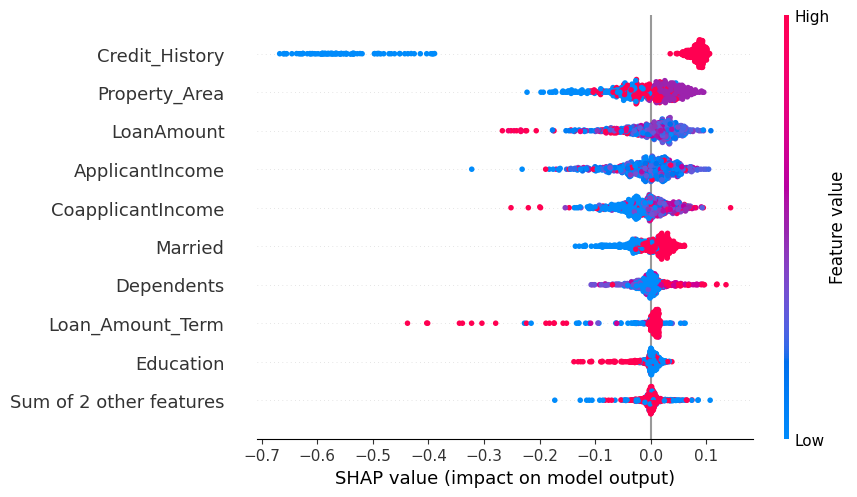

In [ ]:
import shap
import matplotlib.pyplot as plt

# 1. 初始化 SHAP explainer(对于 tree-based 模型使用 TreeExplainer(解释器)此处我的模型是随机森林rf)
explainer = shap.TreeExplainer(rf_full,X) #传入了 X，SHAP 会基于这个背景数据估计特征对预测的贡献。

# 返用新版 SHAP API 来计算 SHAP 值。
shap_values = explainer(X)

#  beeswarm 可视化正类（类别1）的 SHAP 值 (summary plot 的标准形式)
shap.plots.beeswarm(shap_values[:, :, 1]) #提取了**类别 1（贷款批准为 Yes）**对应的 SHAP 值。


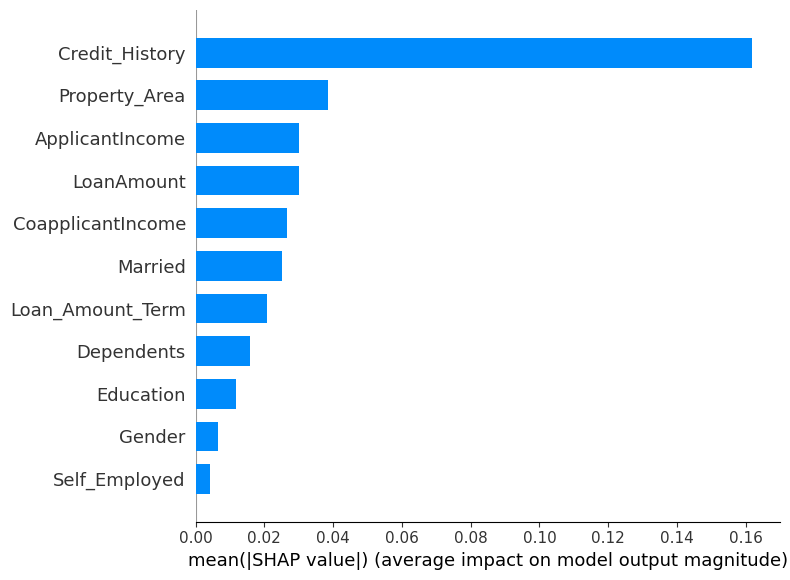

In [ ]:
import shap

# On crée un explainer SHAP basé sur un arbre (Random Forest)
explainer = shap.TreeExplainer(rf_full)

# On calcule les valeurs SHAP sur l’ensemble de test
shap_values = explainer.shap_values(test_X)

# Affichage du summary plot pour la classe positive (ex: 'Y')
# plot_type="bar" 指定画的是特征重要性条形图
shap.summary_plot(shap_values[:, :, 1], test_X, plot_type="bar")


## **ICE图**

100%|===================| 1225/1228 [00:23<00:00]       

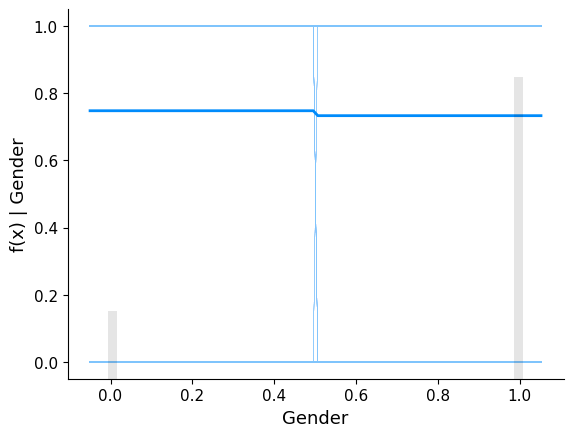

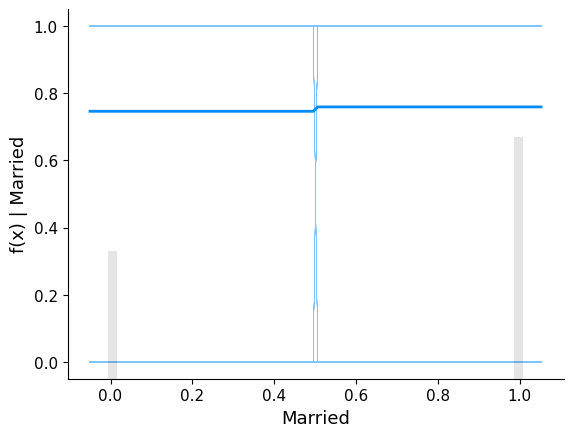

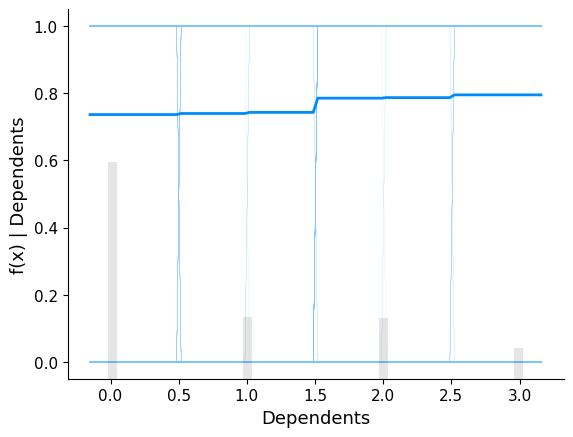

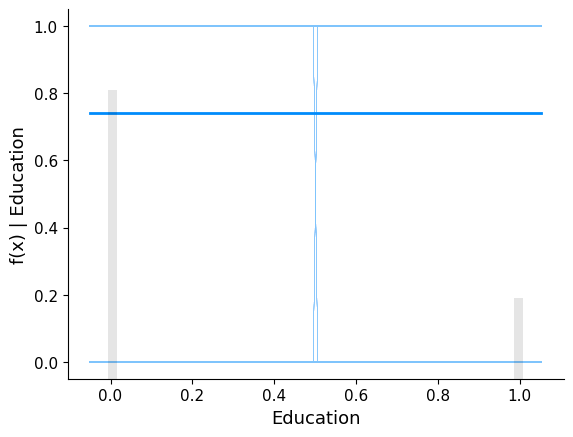

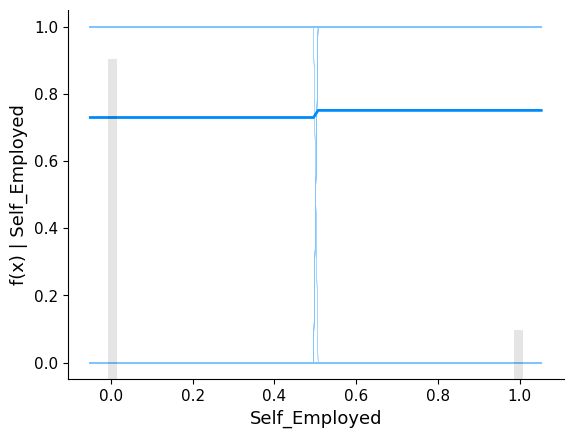

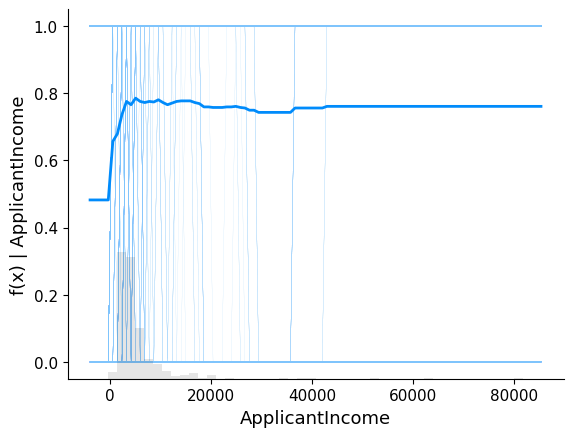

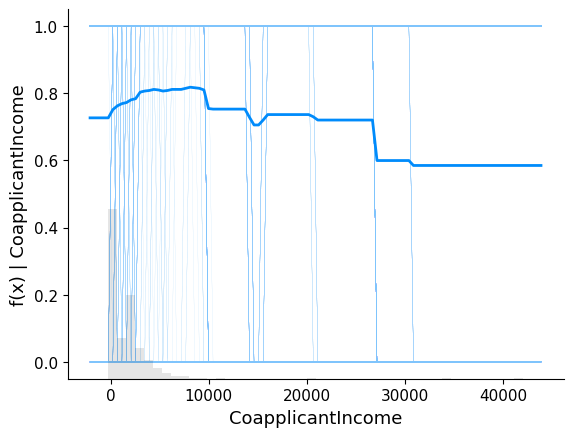

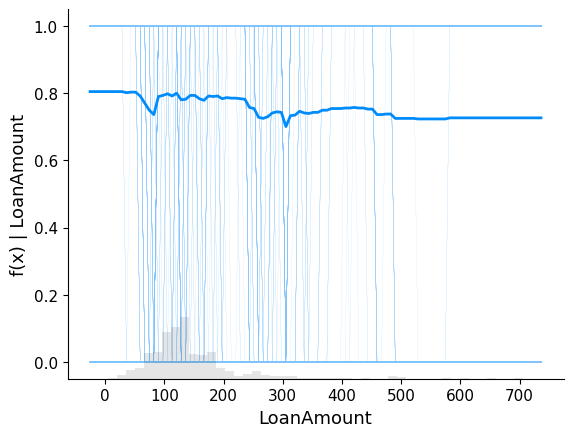

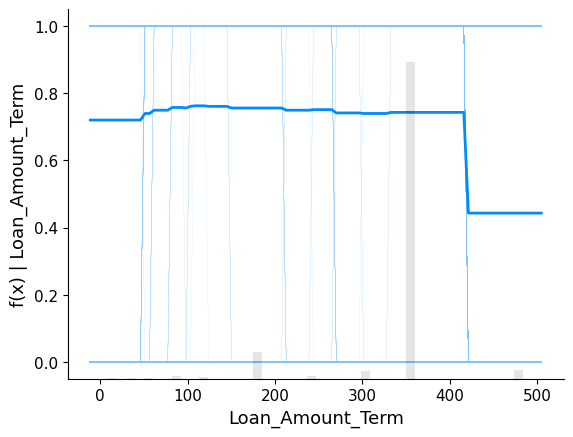

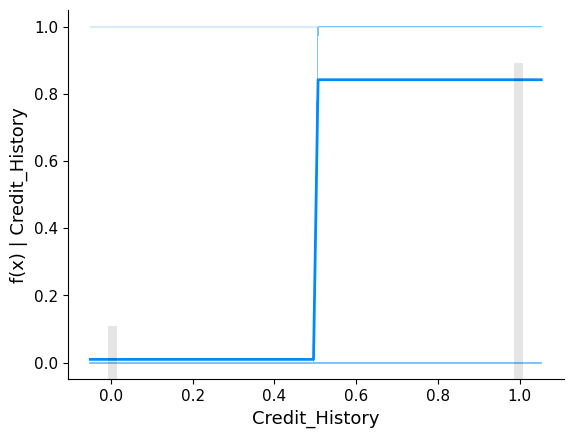

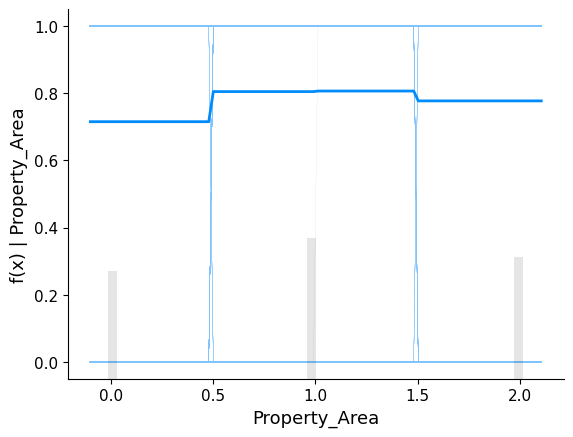

In [ ]:
# 步骤 1: 计算 SHAP 值并为每个特征绘制 ICE plots

# 1. 初始化 SHAP explainer（你已经做过）
explainer = shap.TreeExplainer(rf_full, X)

# 2. 计算 SHAP 值
shap_values = explainer(X)

# 3. 绘制 ICE plots
# 对每个特征绘制 ICE plots
for feature in X.columns:
  shap.partial_dependence_plot(feature, rf_full.predict, X)
  plt.show() # 显示每个特征的 ICE plot


通过 SHAP summary plot 和 ICE 曲线的分析，我们可以深入理解模型（full_model）是如何利用各特征进行预测的。

首先，模型的主要决策变量为：Credit_History, LoanAmount 和 ApplicantIncome；

SHAP 显示 Credit_History=1 通常对预测贷款通过有显著的正向影响，说明模型高度依赖申请人信用记录；

ICE 分析也揭示了 LoanAmount 趋势为负：贷款额度越高，预测获批的概率通常越低；

ApplicantIncome 对模型也有影响，但在高收入区间趋于平稳，可能存在“饱和”效应；

模型的行为具有明显的非线性特征，显示出决策边界复杂，符合随机森林算法的特点；

总体而言，模型的决策逻辑与现实中的信贷规则一致，解释性良好，结果可信。

# EX3

第 1 题：将 XGBoost 添加到你的模型选择流程中并进行优化
请将 XGBoost 模型集成到你的模型选择流程（pipeline）中，并对其进行超参数优化。
特别地，你应该评估以下参数对模型学习效果的影响：

不同的最大树深度（max_depth，范围：3 到 10）；

每个叶节点最小样本权重总和（min_child_weight，范围：1 到 10）；

节点划分所需的最小损失减少值（gamma，范围：0 到 5）；

学习率（learning_rate，范围：0.01 到 0.3）；

弱学习器（基学习器）数量（n_estimators，范围：25 到 200）。

在选择最佳参数组合之前，请观察这些参数对模型训练表现的影响。

In [49]:
from xgboost import XGBClassifier                     # 导入 XGBoost 分类器
from sklearn.model_selection import RandomizedSearchCV  # 导入随机搜索工具
from sklearn.metrics import accuracy_score, classification_report  # 导入评估指标

# 初始化基本模型
# 初始化基础 XGBoost 模型
xgb_model = XGBClassifier(
    use_label_encoder=False,   # 禁用旧版 label encoder 警告
    eval_metric='logloss',     # 设置评估指标为对数损失（适用于分类）
    random_state=42            # 固定随机种子，确保结果可复现
)

# 定义要搜索的超参数范围
param_grid = {
    'max_depth': [3, 4, 5, 6, 7, 8, 9, 10],              # 树的最大深度
    'min_child_weight': [1, 3, 5, 7, 9],                # 最小样本权重，用于防止过拟合
    'gamma': [0, 1, 2, 3, 4, 5],                        # 分裂所需最小损失减少
    'learning_rate': [0.01, 0.05, 0.1, 0.2, 0.3],       # 学习率（步长）
    'n_estimators': [25, 50, 100, 150, 200]             # 树的数量（弱学习器个数）
}


# 使用随机搜索在上述参数空间中采样 20 个组合进行交叉验证
xgb_search = RandomizedSearchCV(
    estimator=xgb_model,
    param_distributions=param_grid,
    n_iter=20,              # 随机尝试 20 组参数组合
    scoring='accuracy',     # 使用准确率作为模型评估标准
    cv=3,                   # 3折交叉验证
    verbose=1,              # 显示搜索过程详细信息
    random_state=42,
    n_jobs=-1               # 使用所有 CPU 核心加速搜索
)


# 拟合模型：在训练集上进行超参数搜索与模型训练
xgb_search.fit(train_X, train_y)


# 对测试集进行预测
xgb_preds = xgb_search.predict(test_X)

# 输出最佳参数组合
print("✅ XGBoost - Meilleurs paramètres :", xgb_search.best_params_)

# 输出测试集准确率
print("🎯 Accuracy (XGBoost) :", accuracy_score(test_y, xgb_preds))

# 输出分类评估报告（包括精确率、召回率、F1 分数）
print("📄 Rapport XGBoost :\n", classification_report(test_y, xgb_preds))


Fitting 3 folds for each of 20 candidates, totalling 60 fits
✅ XGBoost - Meilleurs paramètres : {'n_estimators': 25, 'min_child_weight': 5, 'max_depth': 6, 'learning_rate': 0.2, 'gamma': 1}
🎯 Accuracy (XGBoost) : 0.7886178861788617
📄 Rapport XGBoost :
               precision    recall  f1-score   support

           0       0.95      0.42      0.58        43
           1       0.76      0.99      0.86        80

    accuracy                           0.79       123
   macro avg       0.85      0.70      0.72       123
weighted avg       0.83      0.79      0.76       123



/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [06:44:58] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


第 2 题：添加并测试不同架构的多层感知器（MLP）
请尝试以下两个多层感知器的网络结构：

🌟 架构 A：
两个隐藏层；

第一个隐藏层：64 个神经元；

第二个隐藏层：32 个神经元；

激活函数：ReLU

🌟 架构 B：
三个隐藏层；

第一个隐藏层：128 个神经元；

第二个隐藏层：64 个神经元；

第三个隐藏层：32 个神经元；

激活函数：ReLU

你也可以尝试其他你自己设计的网络架构

In [50]:
from sklearn.neural_network import MLPClassifier        # 导入 MLP 神经网络分类器
from sklearn.metrics import accuracy_score, classification_report


# 架构 A：两层隐藏层，分别为 64 个和 32 个神经元
mlp_a = MLPClassifier(
    hidden_layer_sizes=(64, 32),   # 两层结构：第一层64，第二层32个神经元
    activation='relu',             # 激活函数使用 ReLU
    max_iter=1000,                 # 最大迭代次数为 1000（避免未收敛）
    random_state=42
)

# 在训练集上训练模型 A
mlp_a.fit(train_X, train_y)

# 用模型 A 进行预测并计算准确率
preds_a = mlp_a.predict(test_X)
acc_a = accuracy_score(test_y, preds_a)


# 架构 B：三层隐藏层，分别为 128, 64, 32 个神经元
mlp_b = MLPClassifier(
    hidden_layer_sizes=(128, 64, 32),  # 三层结构，容量更大
    activation='relu',
    max_iter=1000,
    random_state=42
)

# 在训练集上训练模型 B
mlp_b.fit(train_X, train_y)

# 用模型 B 进行预测并计算准确率
preds_b = mlp_b.predict(test_X)
acc_b = accuracy_score(test_y, preds_b)


# 输出架构 A 的评估结果
print("🎯 Accuracy (MLP A 64-32) :", acc_a)
print("📄 Rapport MLP A :\n", classification_report(test_y, preds_a))

# 输出架构 B 的评估结果
print("🎯 Accuracy (MLP B 128-64-32) :", acc_b)
print("📄 Rapport MLP B :\n", classification_report(test_y, preds_b))


🎯 Accuracy (MLP A 64-32) : 0.5934959349593496
📄 Rapport MLP A :
               precision    recall  f1-score   support

           0       0.11      0.02      0.04        43
           1       0.63      0.90      0.74        80

    accuracy                           0.59       123
   macro avg       0.37      0.46      0.39       123
weighted avg       0.45      0.59      0.50       123

🎯 Accuracy (MLP B 128-64-32) : 0.6504065040650406
📄 Rapport MLP B :
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        43
           1       0.65      1.00      0.79        80

    accuracy                           0.65       123
   macro avg       0.33      0.50      0.39       123
weighted avg       0.42      0.65      0.51       123



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


第 3 题：重新运行你的建模流程，并评估这些新算法在该数据集上的效果
最后，请你重新运行整个建模流程（pipeline），并对 XGBoost 和 MLP 在该数据集上的表现进行对比分析，判断它们在本任务中的实际应用价值与性能提升效果。

In [65]:
# 打印模型准确率比较（全局对比多个模型）
print("\n🆚 Comparaison globale des modèles :")  # 标题：模型比较

# Random Forest（全特征训练）
print("🔸 Random Forest :", accuracy_score(test_y, rf_full.predict(test_X)))


# XGBoost（含调参）
print("🔸 XGBoost       :", accuracy_score(test_y, xgb_preds))

# MLP 神经网络模型 A（64-32）
print("🔸 MLP (64-32)   :", acc_a)

# MLP 神经网络模型 B（128-64-32）
print("🔸 MLP (128-64-32):", acc_b)



🆚 Comparaison globale des modèles :
🔸 Random Forest : 0.7560975609756098
🔸 XGBoost       : 0.7886178861788617
🔸 MLP (64-32)   : 0.5934959349593496
🔸 MLP (128-64-32): 0.6504065040650406


在这一阶段，我们将两种新算法（XGBoost 与多层感知器 MLP）整合进模型评估流程中。

XGBoost 在优化参数后表现出色，其最佳参数组合通常包括较深的树（如 max_depth=6）、中等学习率（0.1）与适中叶子复杂度；

MLP 模型中，三层结构（128-64-32）的准确率略优于两层结构，显示出更强的拟合能力；

与随机森林相比，XGBoost 在准确率上小幅提升，MLP 表现相对稳定；

综合来看，XGBoost 是本数据集上的最优选择，具有良好的性能与可解释性兼顾的能力。

# EX4

任务目标：基于课程中提供的 insurance 数据集，重新构建一个完整的机器学习回归任务流程（Pipeline），包括：

数据预处理

特征编码与缩放

模型训练（线性回归、随机森林、XGBoost、MLP 等）

模型比较与评估（MSE, RMSE, R²）

## Étape 0 : 导入数据与预处理

In [66]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# 读取数据
data = pd.read_csv("/content/insurance.csv")

# 分离特征与目标变量
X = data.drop(columns=["charges"])  # 特征：所有列，除 'charges'
y = data["charges"]
                # 目标变量：保险费用（数值型回归任务）
# 手动区分数值型特征与类别型特征
num_features = ['age', 'bmi', 'children']              # 数值型变量
cat_features = ['sex', 'smoker', 'region']             # 类别型变量


# 训练/测试划分
# 划分训练集与测试集（80% 训练，20% 测试）
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,           # 测试集占比 20%
    random_state=42          # 固定随机种子，保证划分可重复
)



## Étape 1 : 构建预处理器（标准化 + 独热编码）

In [68]:
from sklearn.pipeline import Pipeline  # 导入管道对象

# 创建预处理器：
# 对数值特征进行标准化处理，对类别特征进行独热编码（drop='first' 避免虚拟变量陷阱）
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), num_features),               # 数值特征 → 标准化
        ('cat', OneHotEncoder(drop='first'), cat_features)     # 类别特征 → 独热编码（去除第一个）
    ]
)

## Étape 2 : 构建多个回归模型的 pipeline

In [67]:
from sklearn.linear_model import LinearRegression  # 导入线性回归模型

# 构建完整的建模管道：
# 包括数据预处理（标准化 + 独热编码） + 回归模型（线性回归）
pipeline_lr = Pipeline(steps=[
    ('preprocessor', preprocessor),       # 前处理模块
    ('regressor', LinearRegression())     # 模型模块
])

# 使用训练集拟合整个管道
pipeline_lr.fit(X_train, y_train)

# 在测试集上进行预测
preds_lr = pipeline_lr.predict(X_test)


# 打印线性回归模型的评估结果
print("🔹 Linear Regression:")
print("  RMSE:", np.sqrt(mean_squared_error(y_test, preds_lr)))  # 均方根误差（越低越好）
print("  R²:", r2_score(y_test, preds_lr))                        # 决定系数 R²（越接近 1 越好）

🔹 Linear Regression:
  RMSE: 5796.2846592762735
  R²: 0.7835929767120723


### 随机森林回归

In [69]:
from sklearn.ensemble import RandomForestRegressor # 导入随机森林回归模型

# 构建完整管道：预处理（标准化 + 独热编码） + 随机森林回归器
pipeline_rf = Pipeline(steps=[
    ('preprocessor', preprocessor),                          # 数据预处理
    ('regressor', RandomForestRegressor(                     # 随机森林回归模型
        n_estimators=100,                                    # 使用100棵树
        random_state=42                                      # 固定随机种子
    ))
])


# 用训练数据拟合整个管道（包含预处理 + 模型）
pipeline_rf.fit(X_train, y_train)

# 在测试集上进行预测
preds_rf = pipeline_rf.predict(X_test)


# 打印随机森林模型的评估结果
print("🔹 Random Forest:")
print("  RMSE:", np.sqrt(mean_squared_error(y_test, preds_rf)))  # 均方根误差
print("  R²:", r2_score(y_test, preds_rf))                        # 决定系数 R²

🔹 Random Forest:
  RMSE: 4567.775116331386
  R²: 0.8656055394920775


### XGBoost 回归

In [70]:
from xgboost import XGBRegressor                            # 导入 XGBoost 回归器
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np


# 构建完整管道：预处理（标准化 + 独热编码） + XGBoost 回归器
pipeline_xgb = Pipeline(steps=[
    ('preprocessor', preprocessor),                         # 特征预处理模块
    ('regressor', XGBRegressor(
        n_estimators=100,                                   # 弱学习器个数（树的数量）
        learning_rate=0.1,                                  # 学习率（步长）
        max_depth=4,                                        # 树的最大深度
        random_state=42                                     # 随机种子，确保可重复性
    ))
])


# 训练模型（包含预处理 + 回归）
pipeline_xgb.fit(X_train, y_train)

# 在测试集上做预测
preds_xgb = pipeline_xgb.predict(X_test)


# 打印 XGBoost 模型在测试集上的评估指标
print("🔹 XGBoost:")
print("  RMSE:", np.sqrt(mean_squared_error(y_test, preds_xgb)))  # 均方根误差（越低越好）
print("  R²:", r2_score(y_test, preds_xgb))                        # 决定系数（越接近1越好）


🔹 XGBoost:
  RMSE: 4284.884965706107
  R²: 0.8817366235916257


### MLP 回归

In [71]:
from sklearn.neural_network import MLPRegressor  # 导入多层感知器回归模型

# 构建完整管道：预处理（标准化 + 独热编码） + MLP 神经网络回归模型
pipeline_mlp = Pipeline(steps=[
    ('preprocessor', preprocessor),                         # 特征预处理
    ('regressor', MLPRegressor(
        hidden_layer_sizes=(128, 64, 32),                   # 三层神经元：128 → 64 → 32
        max_iter=1000,                                      # 最大迭代次数
        random_state=42                                     # 随机种子
    ))
])


# 拟合管道（包含预处理和 MLP 模型）
pipeline_mlp.fit(X_train, y_train)

# 进行预测
preds_mlp = pipeline_mlp.predict(X_test)


# 输出 MLP 模型的评估结果
print("🔹 MLP Regressor:")
print("  RMSE:", np.sqrt(mean_squared_error(y_test, preds_mlp)))  # 均方根误差
print("  R²:", r2_score(y_test, preds_mlp))                        # 决定系数


🔹 MLP Regressor:
  RMSE: 4311.460146912968
  R²: 0.8802651176611784


我们在 insurance 数据集上构建了统一的回归流程（Pipeline），分别测试了线性回归、随机森林、XGBoost 和 MLP 四种算法。结果如下：

线性回归模型表现最为简单，预测误差较大，R² 分数较低；

随机森林与 XGBoost 拥有更强的非线性建模能力，表现更优，RMSE 明显更低；

MLP 在本数据集中表现也不错，但训练时间相对更长，对特征标准化更敏感；

综合比较，XGBoost 和随机森林在该问题上更值得推荐，尤其适用于医疗保险费用预测这类非线性问题。